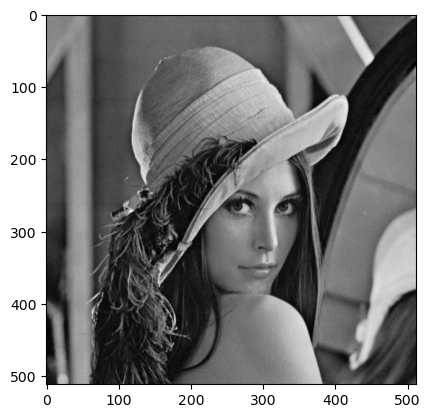

In [62]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# 查看原图
img = cv2.imread('image/lena.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# 查看原图
plt.imshow(img, cmap="gray")

In [63]:
# 图片运动模糊处理
kernel_size = 15
angle = 60
# 初始模糊核的方向是-45度
PSF = np.diag(np.ones(kernel_size)) 
# 抵消-45度的影响
angle = angle + 45  
# 生成旋转算子
M = cv2.getRotationMatrix2D((kernel_size / 2, kernel_size / 2), angle, 1)  
#实现旋转变换
PSF = cv2.warpAffine(PSF, M, (kernel_size, kernel_size), flags=cv2.INTER_LINEAR)  
#使模糊核的权重和为1
PSF = PSF / PSF.sum()    
# 拓展PSF，和图片一样大
[img_h, img_w] = img.shape
[h,w] = PSF.shape
print([img_h, img_w, h, w])

[512, 512, 15, 15]


In [64]:
PSF_t = np.zeros((img_h, img_w))
PSF_t[0:h, 0:w] = PSF
PSF = PSF_t

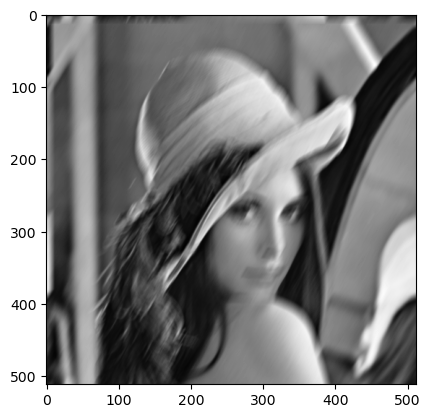

In [74]:
# 频率域对图像进行模糊
eps = 1e-3
# 对输入图像进行傅里叶变换
input_fft =np.fft.fft2(img) 
# 对运动模糊核进行傅里叶变换，并加上一个很小的数
PSF_fft = np.fft.fft2(PSF) + eps 
# 在频域进行运动模糊
blurred = np.fft.ifft2(input_fft * PSF_fft)  
blurred = np.abs(blurred)
plt.imshow(blurred, cmap="gray")

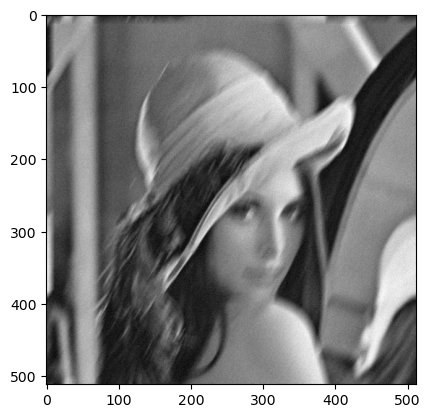

In [75]:
# 添加随机噪声
blurred_noisy = blurred + 0.1 * blurred.std() * np.random.standard_normal(blurred.shape)
plt.imshow(blurred_noisy, cmap="gray")

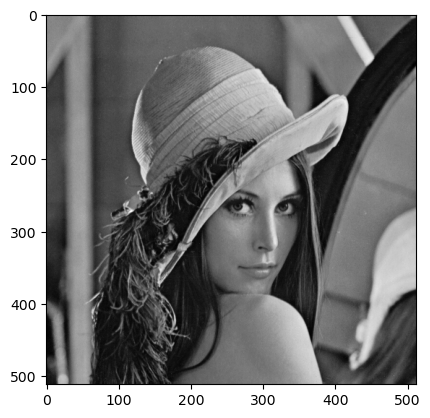

In [76]:
# 对没加噪音进行逆滤波
# 对退化图像进行傅里叶变换
input_fft = np.fft.fft2(blurred)   
# 对运动模糊核进行傅里叶变换，并加上一个很小的数
PSF_fft = np.fft.fft2(PSF) + eps   
# 在频域进行逆滤波
Output_fft = input_fft / PSF_fft  
# 进行傅里叶反变换
result = np.fft.ifft2(Output_fft)          
result = np.abs(result)
plt.imshow(result,cmap="gray")

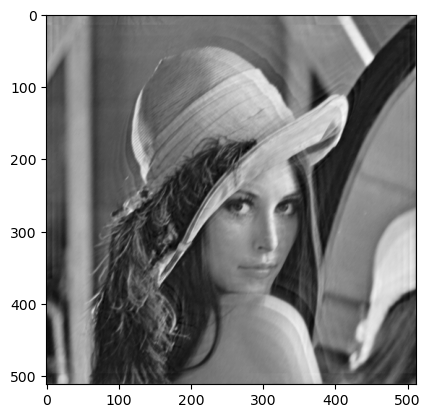

In [77]:
# 没加噪音的维纳滤波
K = 0.01
input_fft = np.fft.fft2(blurred)
PSF_fft = np.fft.fft2(PSF)
PSF_fft_1 = (np.conj(PSF_fft) / (np.abs(PSF_fft)**2 + K))*input_fft     
result = np.fft.ifft2(PSF_fft_1)
result = np.abs(result)
plt.imshow(result, cmap="gray")

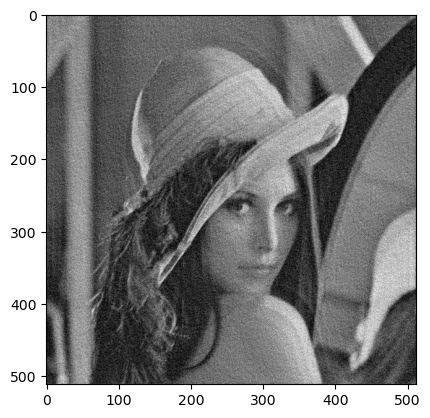

In [78]:
# 加了噪音的维纳滤波
K = 0.01
input_fft = np.fft.fft2(blurred_noisy)
PSF_fft = np.fft.fft2(PSF)
PSF_fft_1 = (np.conj(PSF_fft) / (np.abs(PSF_fft)**2 + K))*input_fft           
result = np.fft.ifft2(PSF_fft_1)
result = np.abs(result)
plt.imshow(result, cmap="gray")